In [1]:
import pandas as pd
import matplotlib.pyplot as plt

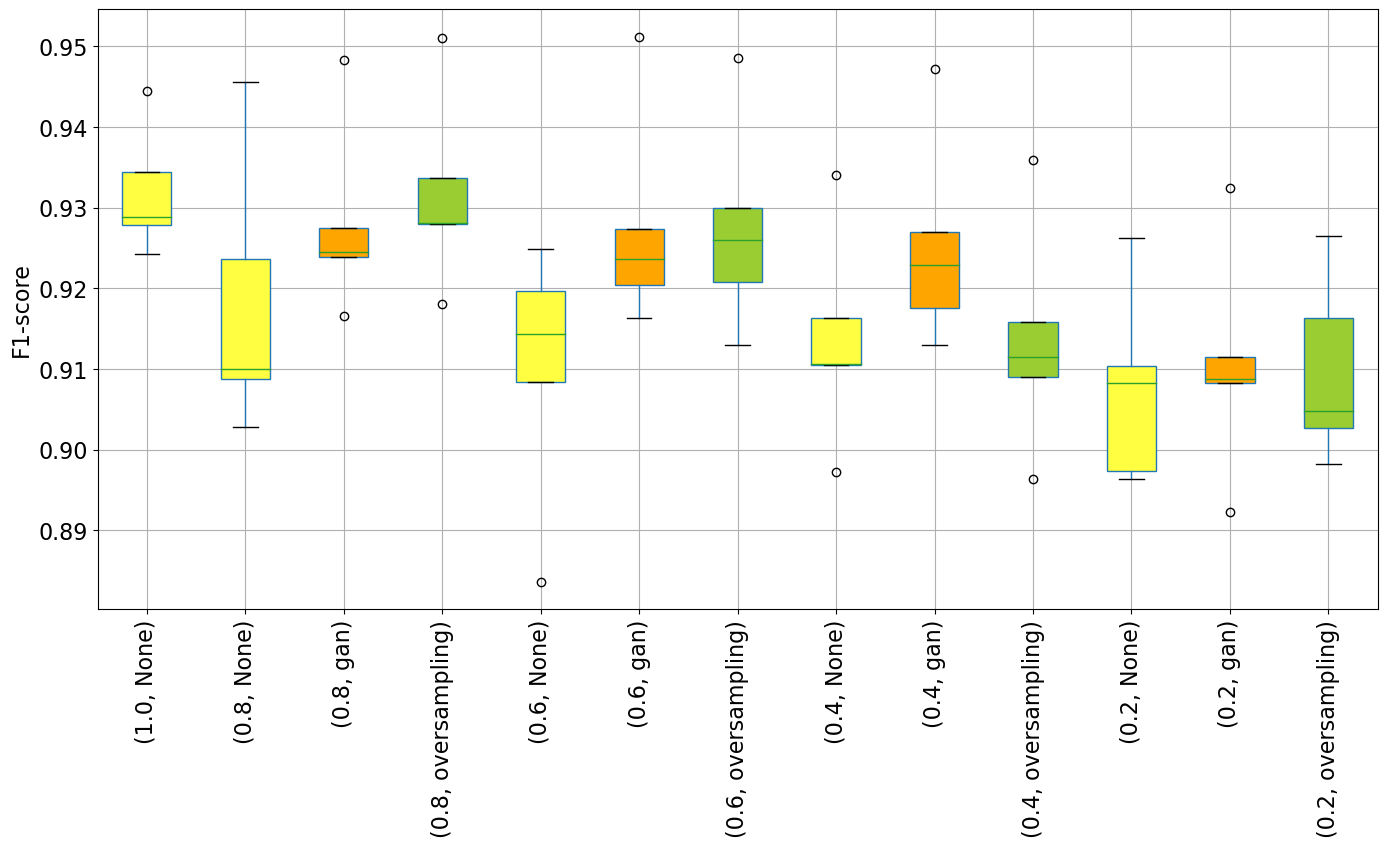

In [73]:
### resnet plot
df = pd.read_csv("Covid_data.csv")
resnet_df = df.iloc[:, [0,1,2,3,4,5,6,7]]
resnet_df = resnet_df[resnet_df["network_name"]=="resnet"]
resnet_df = resnet_df.sort_values("data_ratio", ascending=False)
ratios_dtype = pd.CategoricalDtype([1.0, 0.8, 0.6, 0.4, 0.2], ordered=True)
resnet_df['data_ratio'] = resnet_df['data_ratio'].astype(ratios_dtype)

resnet_df_False = resnet_df[resnet_df["geoaugment"]==False]
resnet_df_True = resnet_df[resnet_df["geoaugment"]==True]

res_ax = resnet_df_False.boxplot(column = "bal_acc", by = ["data_ratio", "augment"], rot = 90, figsize = (16,8), patch_artist = True, fontsize = 16) #, 
color_kinds =['yellow', 'orange', 'yellowgreen']
color_kinds = ["#fffe40", 'orange', 'yellowgreen'] #fffe40
colors = [color_kinds[0],color_kinds[0],color_kinds[1], color_kinds[2],color_kinds[0],color_kinds[1], color_kinds[2],color_kinds[0],color_kinds[1], color_kinds[2],color_kinds[0],color_kinds[1], color_kinds[2],
          color_kinds[0],color_kinds[0],color_kinds[1], color_kinds[2],color_kinds[0],color_kinds[1], color_kinds[2],color_kinds[0],color_kinds[1], color_kinds[2],color_kinds[0],color_kinds[1], color_kinds[2]]

#res_ax.set_ylim(0.89,0.97)

fig = res_ax.get_figure()
fig.suptitle("")
res_ax.set_xlabel("")
res_ax.set_ylabel("F1-score", fontsize = 16)
res_ax.set_title("")


for patch, color in zip(fig.axes[0].patches, colors):
    patch.set_facecolor(color)

plt.savefig("resnet_False_F1.pdf", format="pdf", bbox_inches="tight")

#res_ax.add_patch()

#colors = ['pink', 'lightblue', 'lightgreen']
#for patch, color in zip(res_ax['boxes'], colors):
#    patch.set_facecolor(color)

#res_ax.set_title(label = "Resnet False boxplot")
#resnet_df.groupby(["params/geoaugment", "params/data_ratio",Bparams/augment"]).plot(kind = "box")
#plots = []
#labels = []
#for ratio in ratios:
#    plots.append(resnet_df.loc[(resnet_df["params/data_ratio"]==ratio) & (resnet_df["params/augment"]=="None")& (resnet_df["params/geoaugment"]==False),"params/test/metrics/f1 (last)"].values)

#print(plots[1])

#resnet_df.plot(kind = "box")

#plt.boxplot(resnet_df[resnet_df["test/metrics/f1 (last)"]])

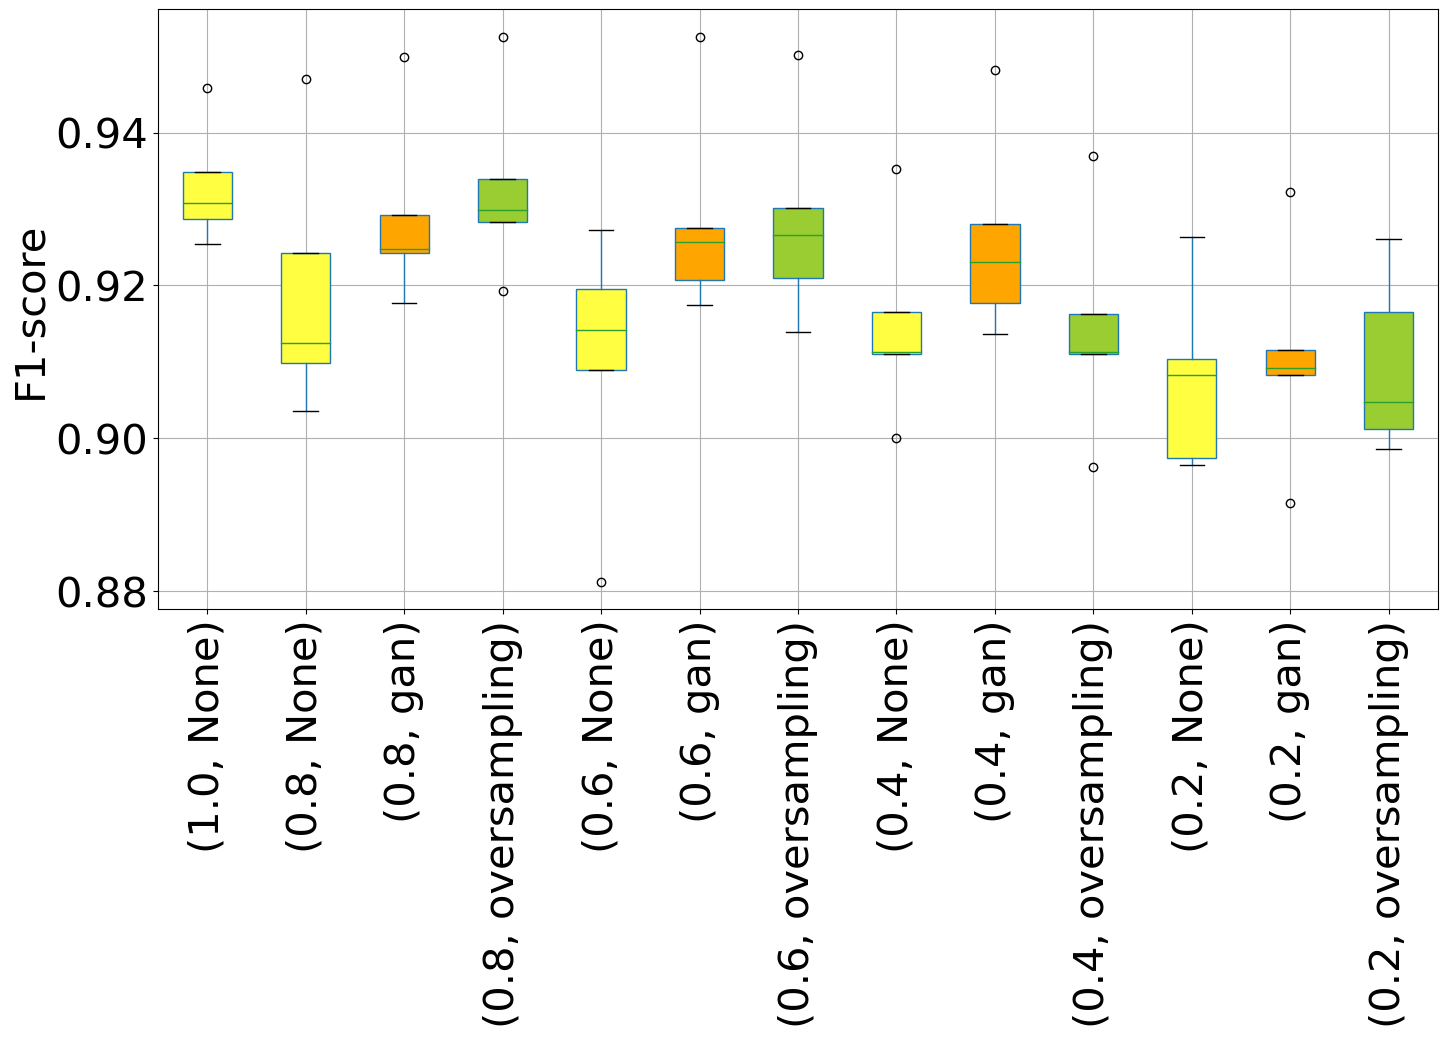

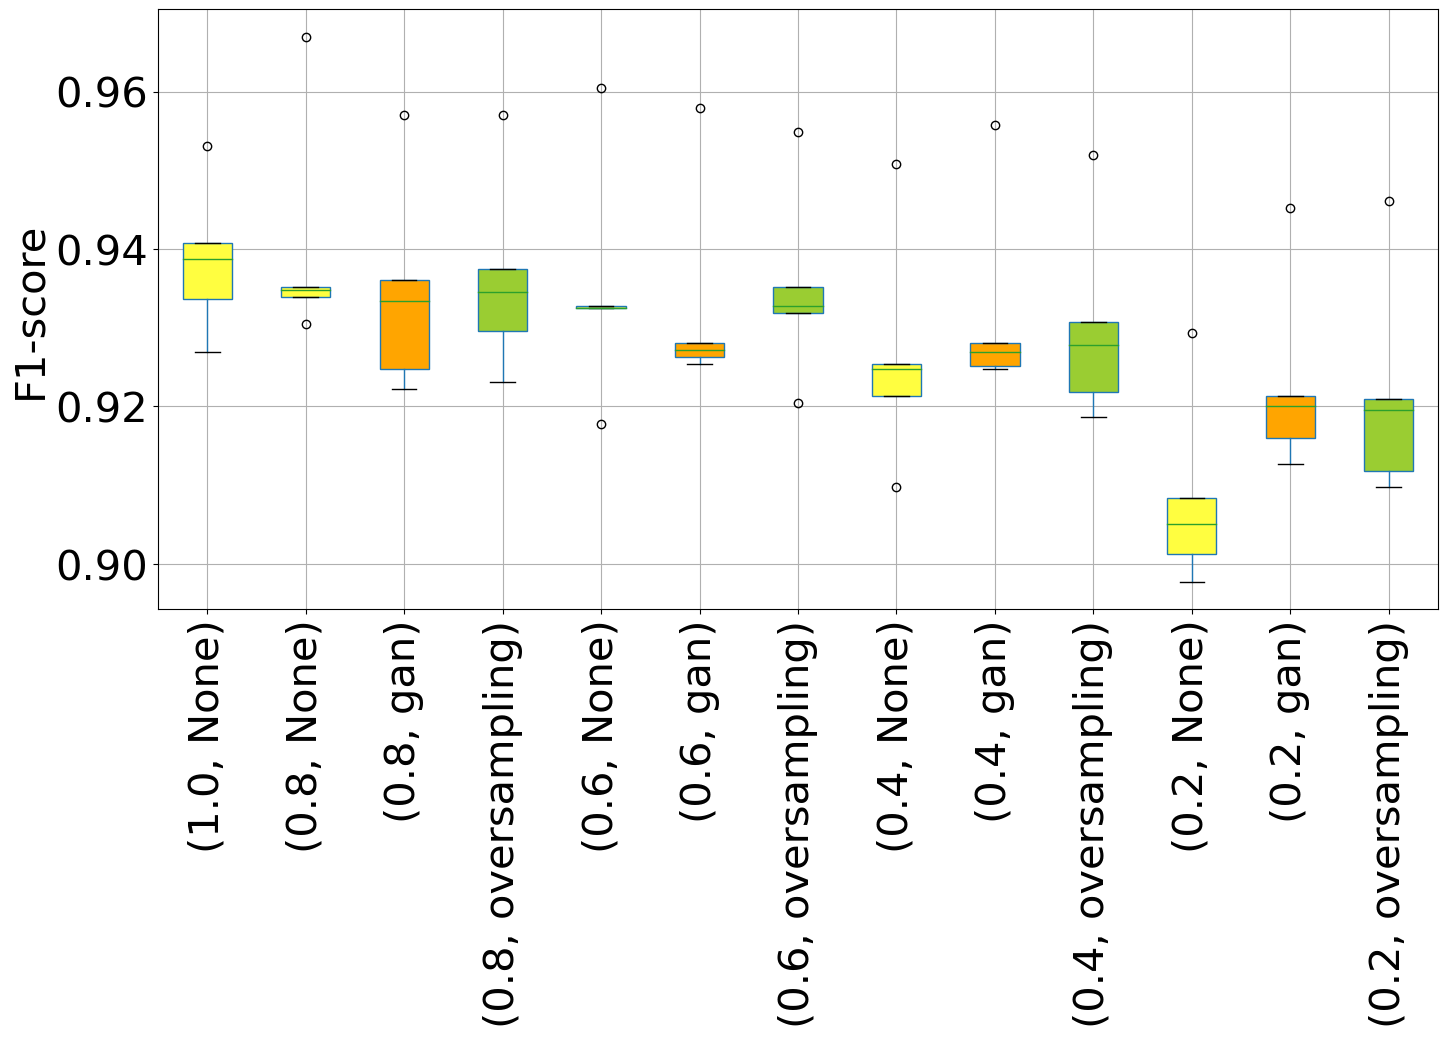

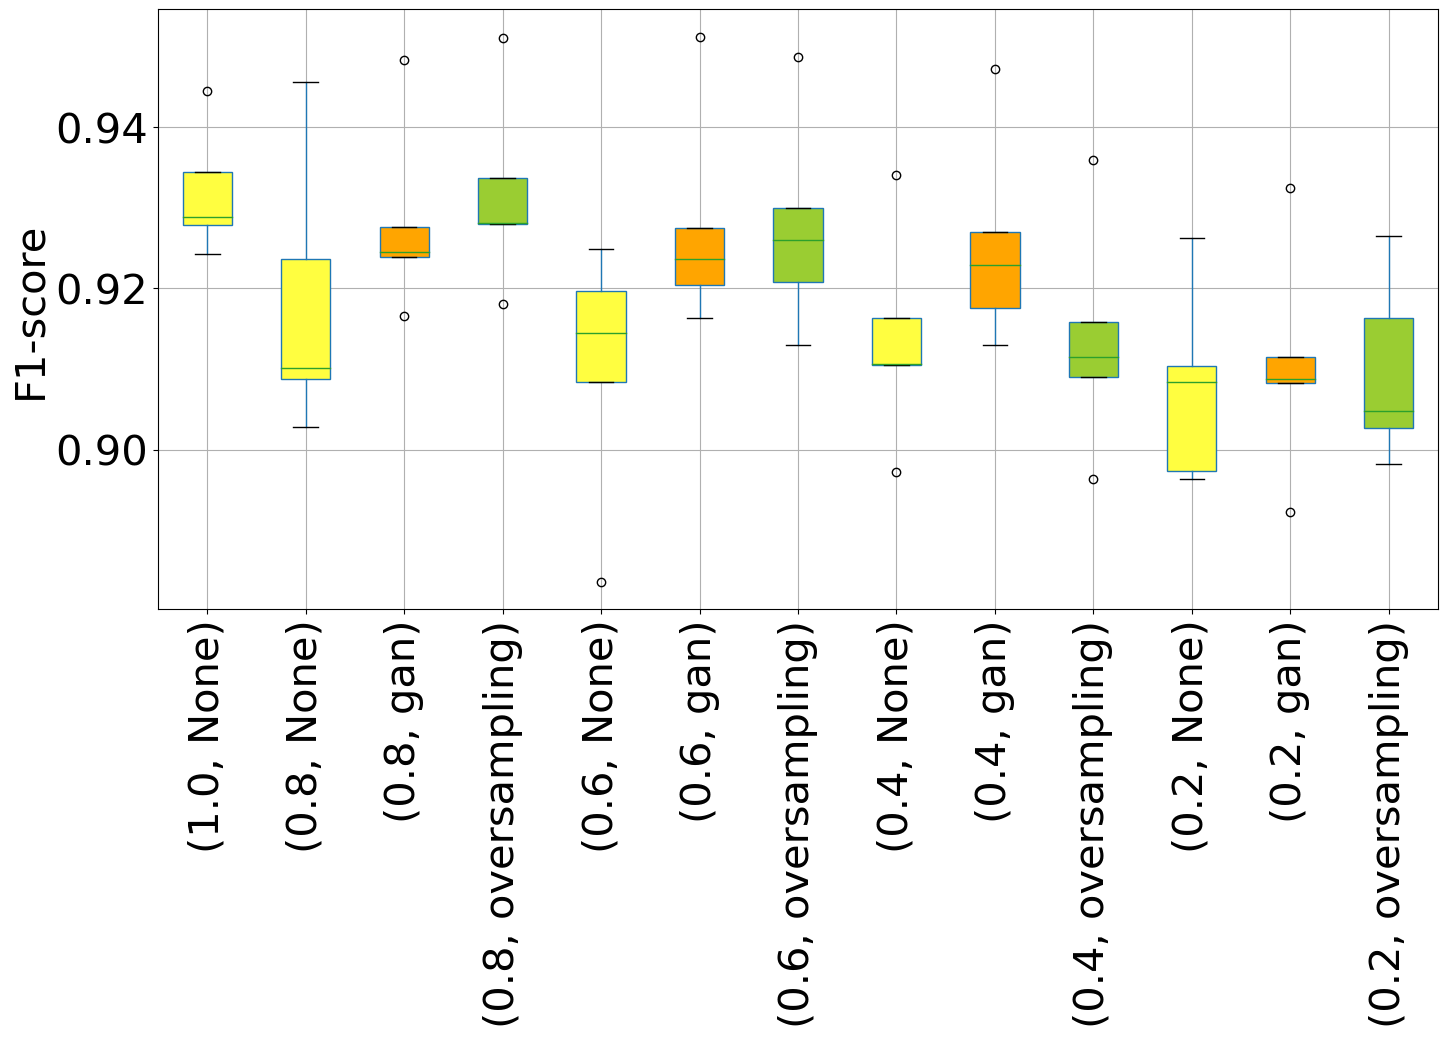

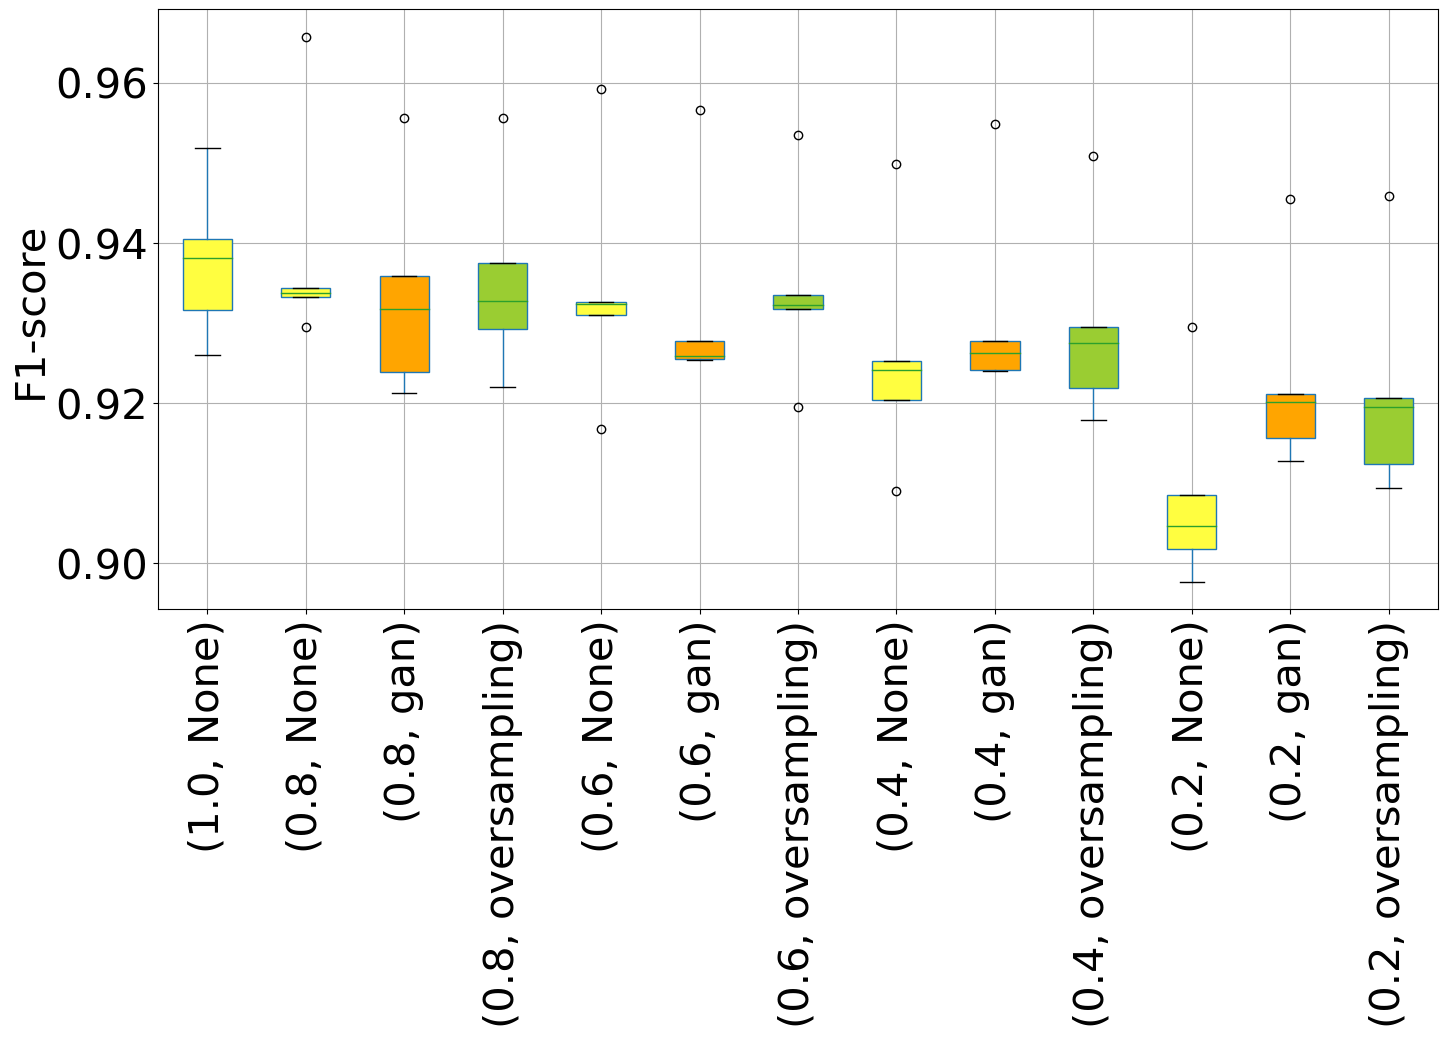

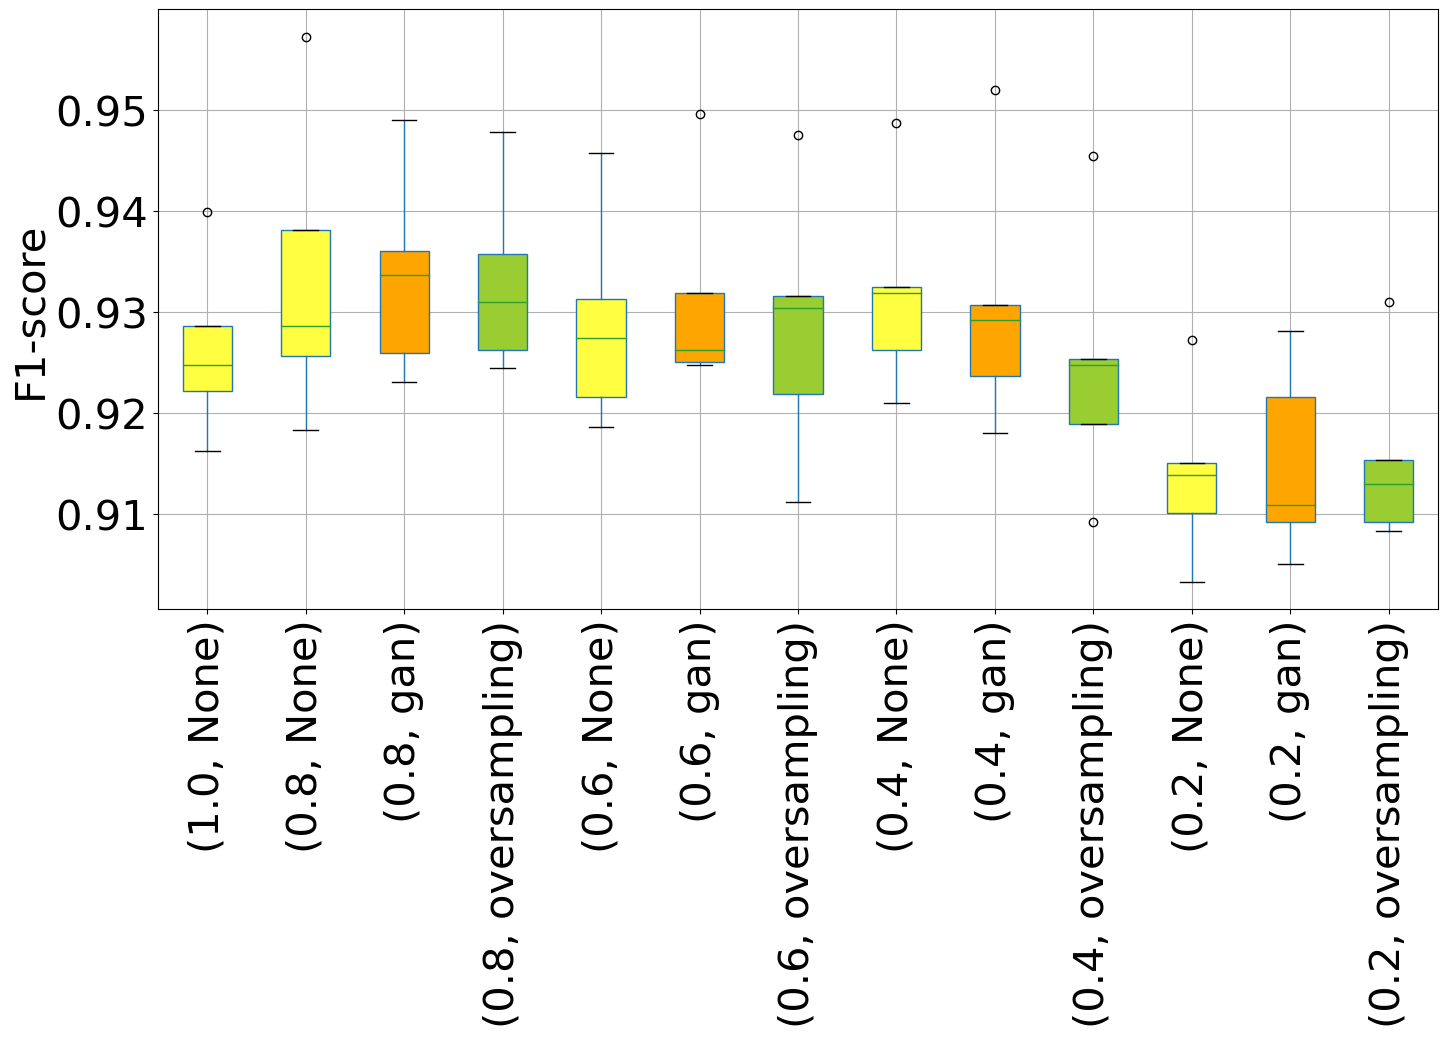

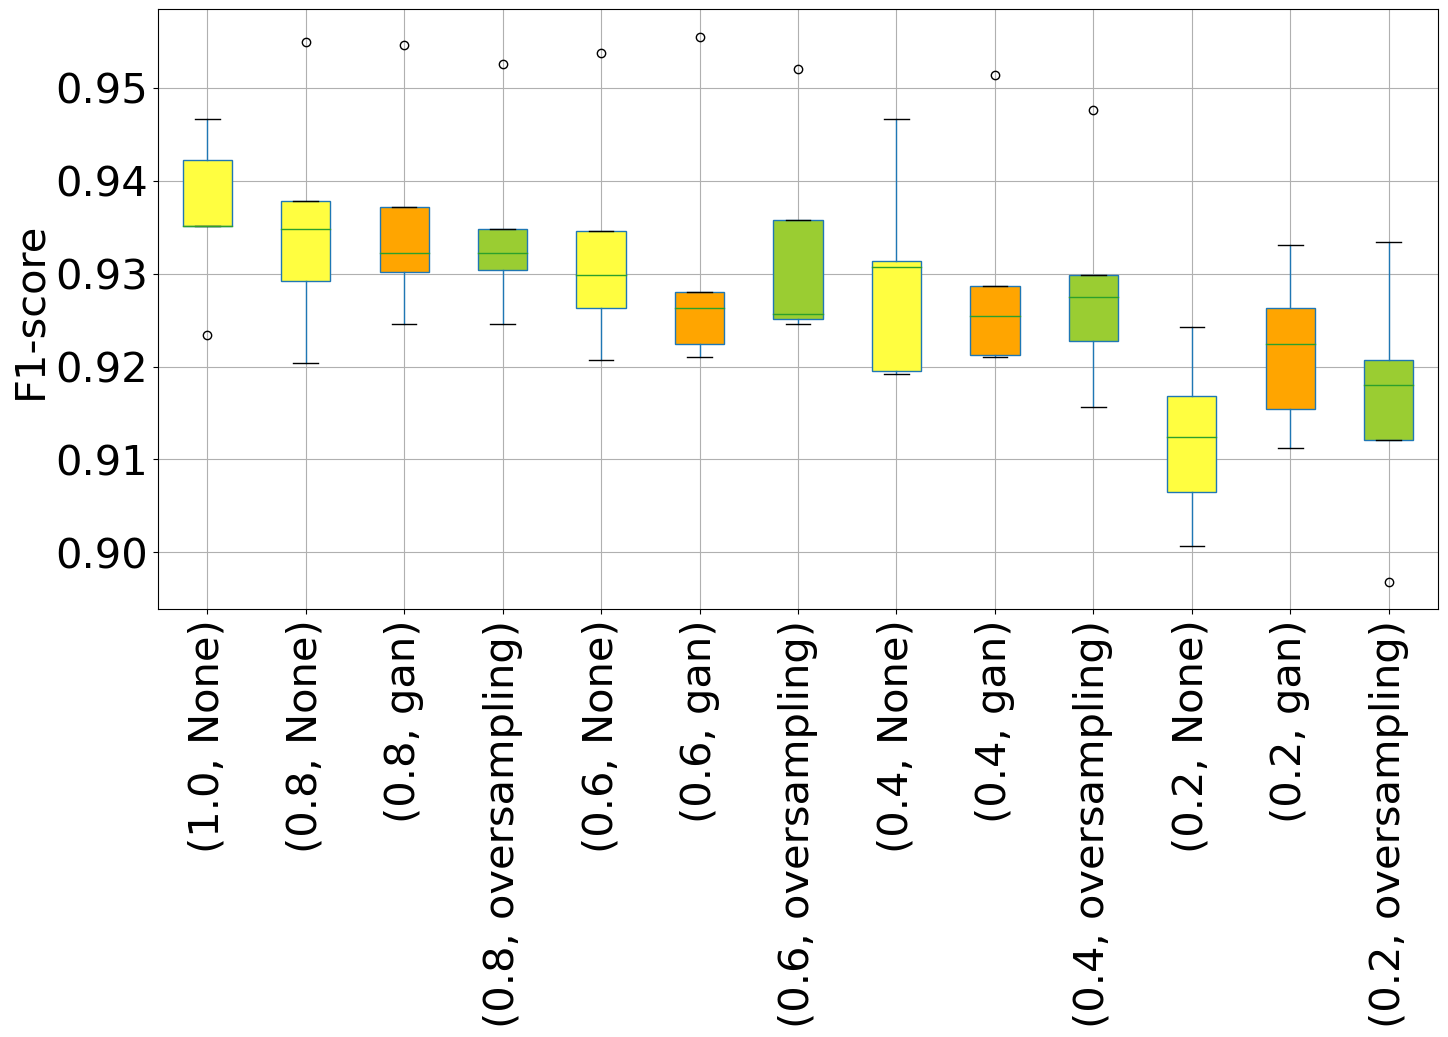

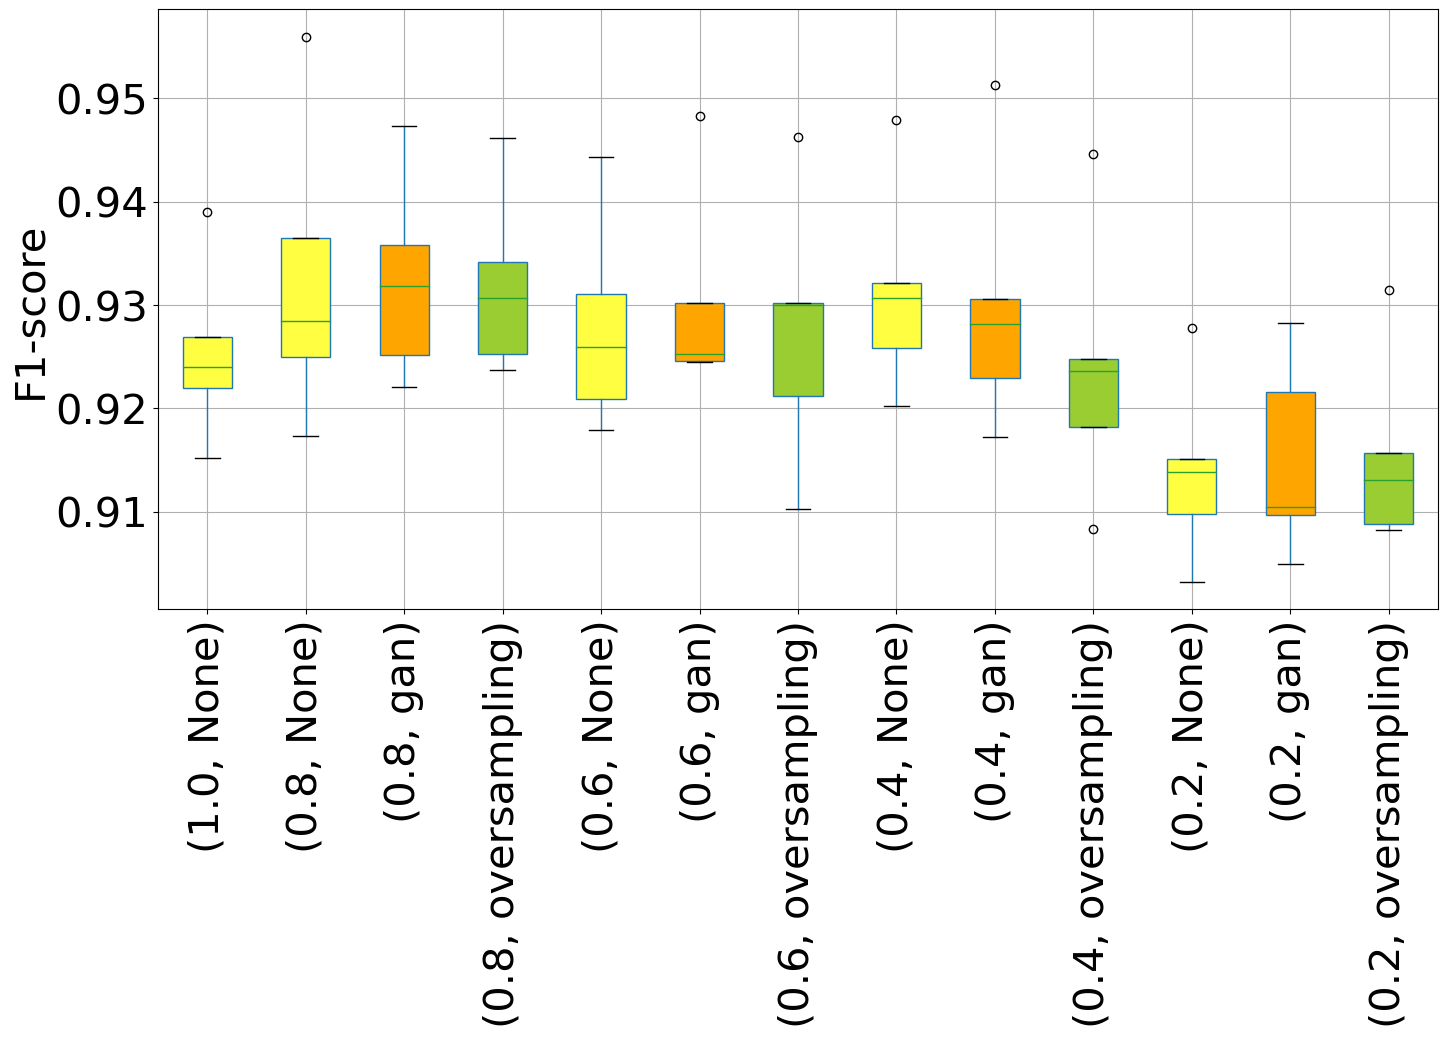

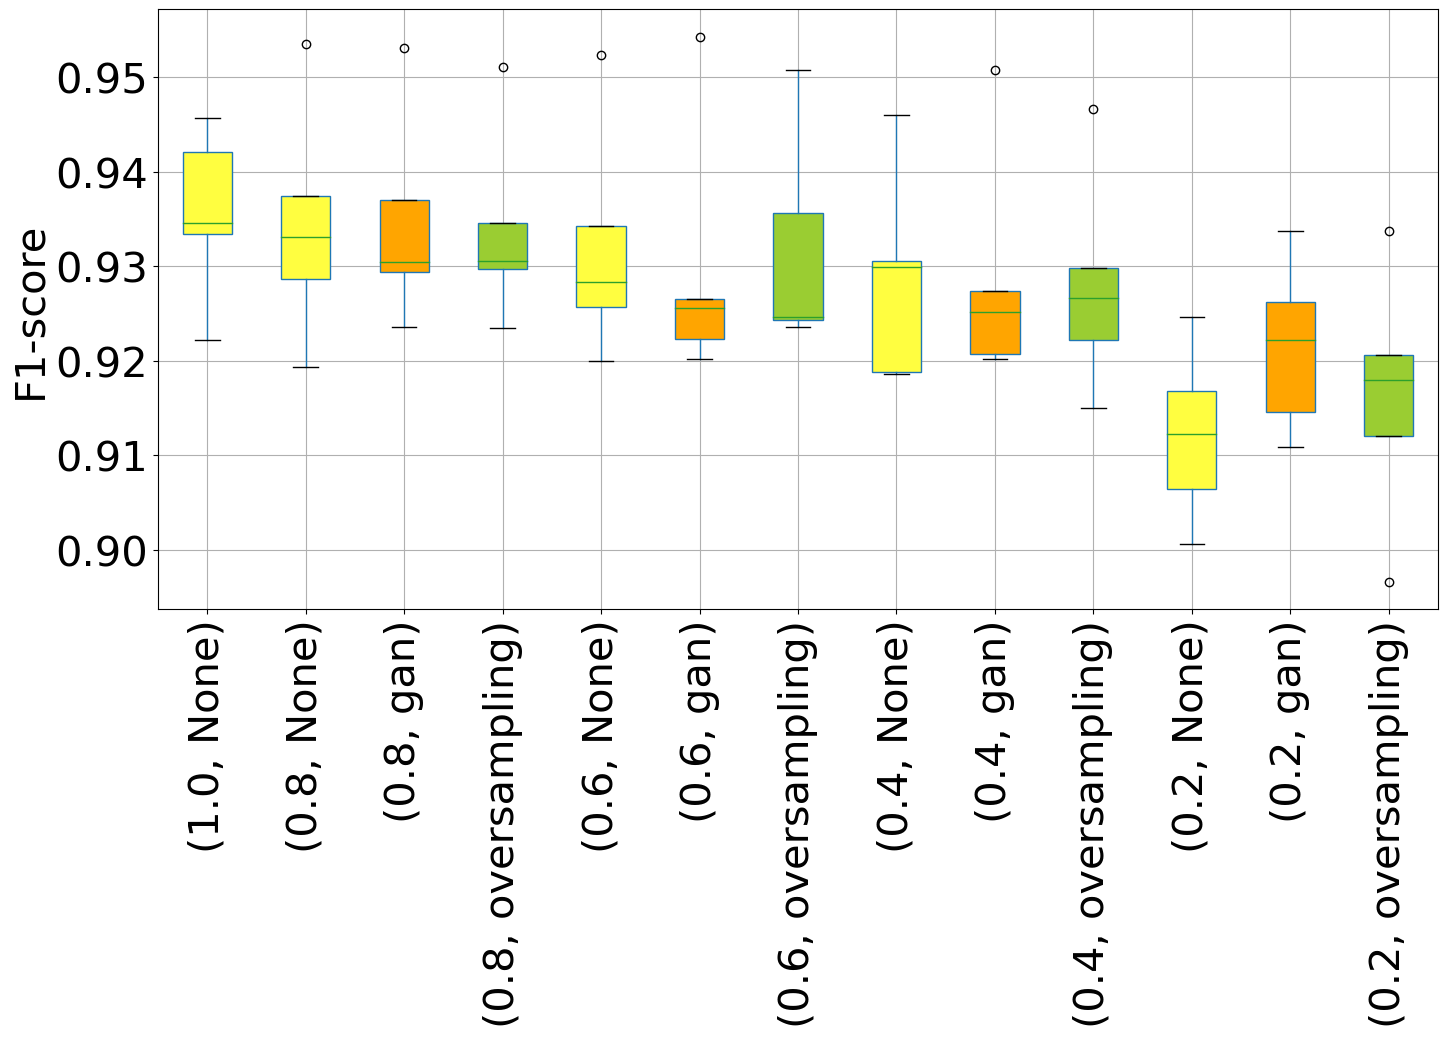

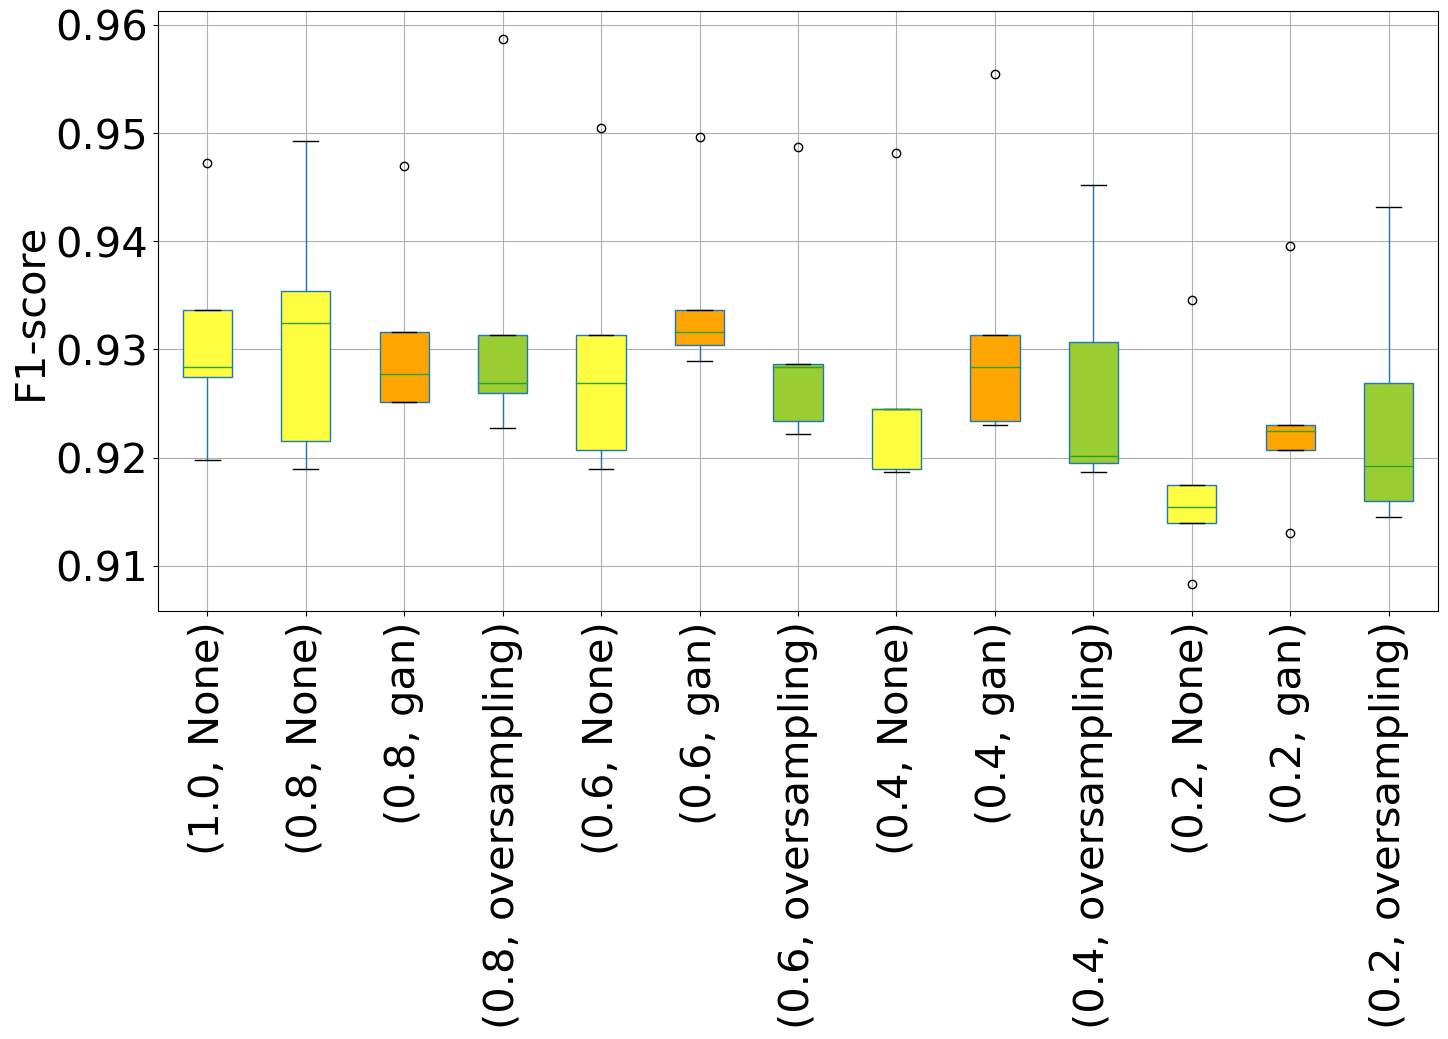

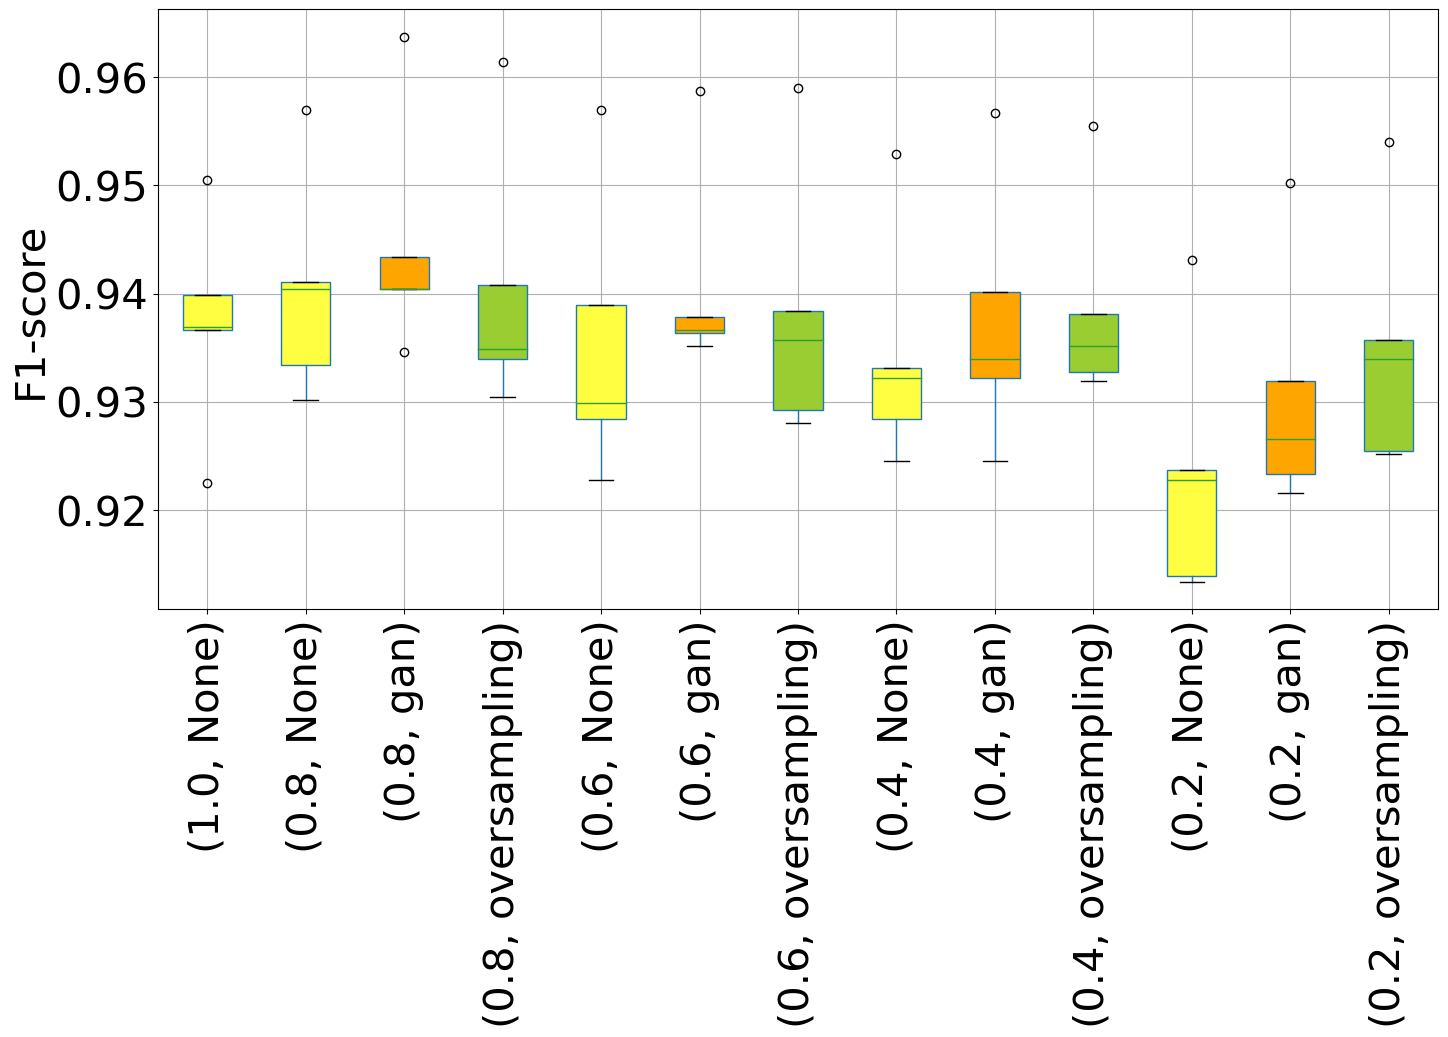

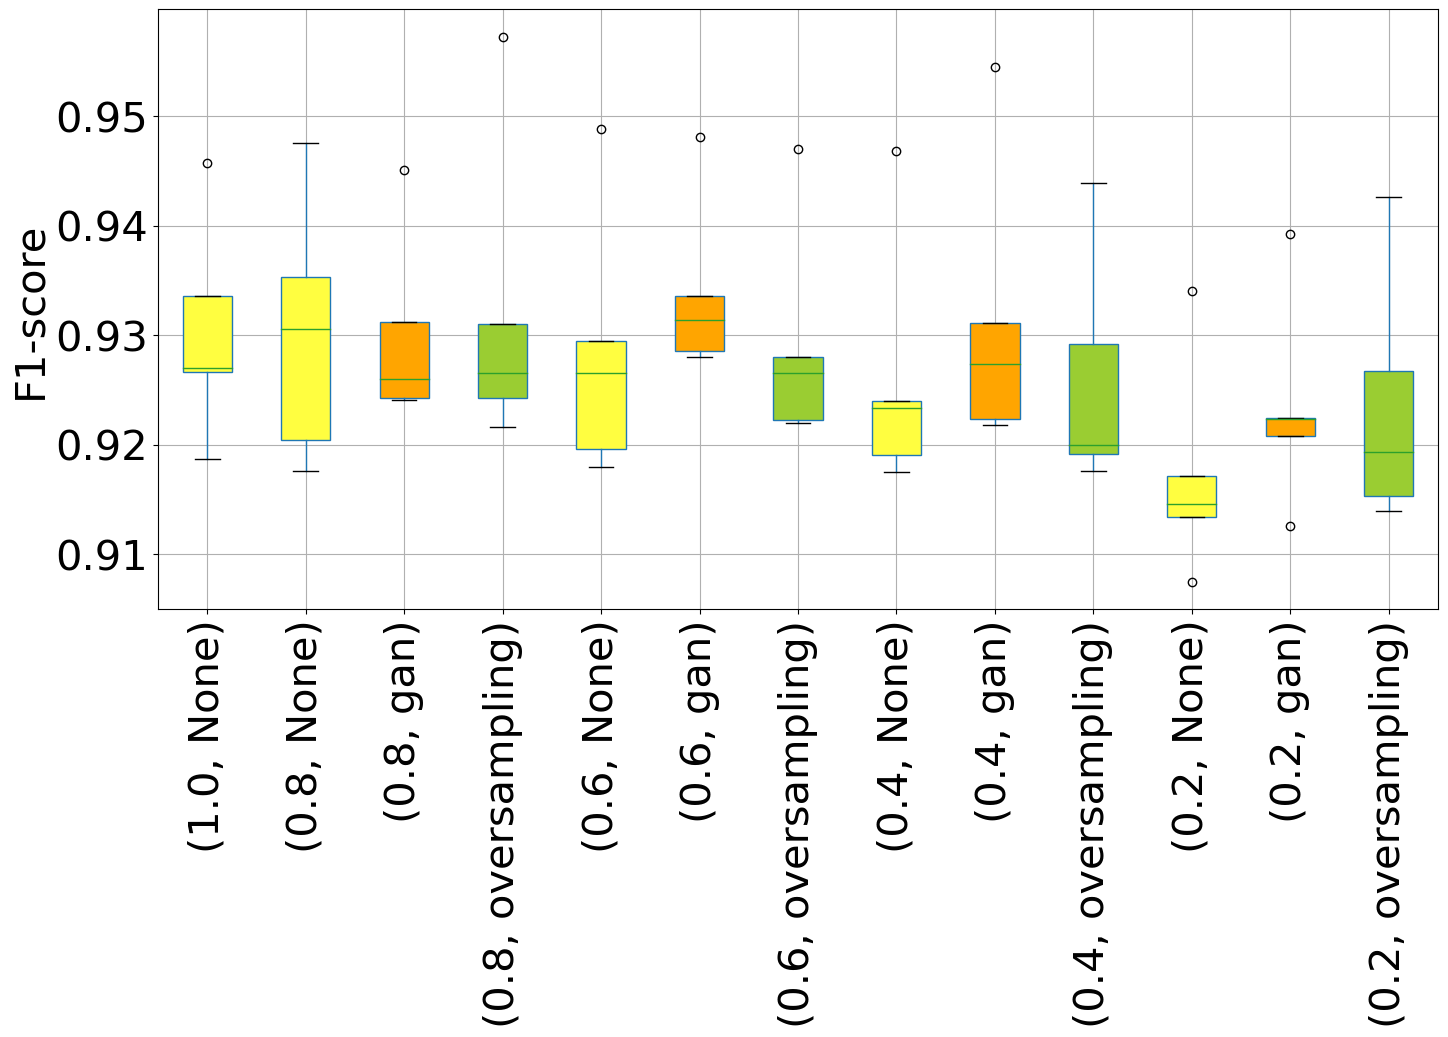

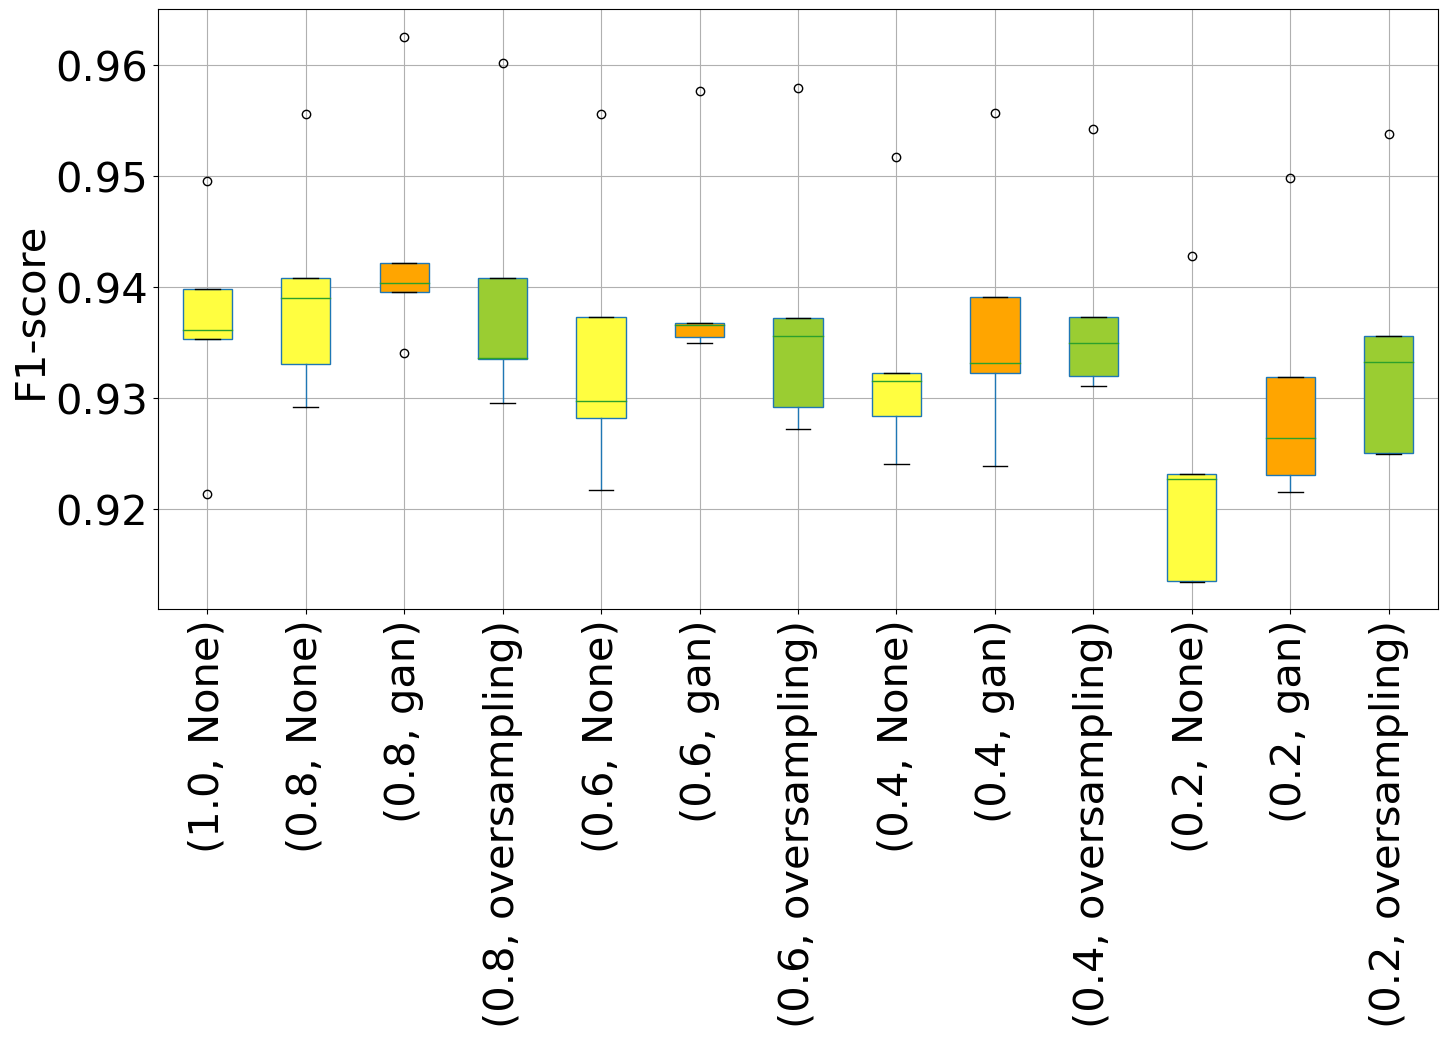

In [76]:
networks = ["resnet", "vgg", "efficient"]
scores = ["f1_score", "bal_acc"]
df = pd.read_csv("Covid_data.csv")

for network in networks:
    temp_df = df[df["network_name"]==network]
    temp_df = temp_df.sort_values("data_ratio", ascending=False)
    ratios_dtype = pd.CategoricalDtype([1.0, 0.8, 0.6, 0.4, 0.2], ordered=True)
    temp_df['data_ratio'] = temp_df['data_ratio'].astype(ratios_dtype)

    temp_df_False = temp_df[temp_df["geoaugment"]==False]
    temp_df_True = temp_df[temp_df["geoaugment"]==True]

    color_kinds =['yellow', 'orange', 'yellowgreen']
    color_kinds = ["#fffe40", 'orange', 'yellowgreen'] #fffe40
    colors = [color_kinds[0],color_kinds[0],color_kinds[1], color_kinds[2],color_kinds[0],color_kinds[1], color_kinds[2],color_kinds[0],color_kinds[1], color_kinds[2],color_kinds[0],color_kinds[1], color_kinds[2],
            color_kinds[0],color_kinds[0],color_kinds[1], color_kinds[2],color_kinds[0],color_kinds[1], color_kinds[2],color_kinds[0],color_kinds[1], color_kinds[2],color_kinds[0],color_kinds[1], color_kinds[2]]

    for score in scores:
        ax = temp_df_False.boxplot(column = score, by = ["data_ratio", "augment"], rot = 90, figsize = (16,8), patch_artist = True, fontsize = 30) #, 
        fig = ax.get_figure()
        fig.suptitle("")
        ax.set_xlabel("")
        ax.set_ylabel("F1-score", fontsize = 30)
        ax.set_title("")
        for patch, color in zip(fig.axes[0].patches, colors):
            patch.set_facecolor(color)
        plt.savefig(f"{network}_False_{score}.pdf", format="pdf", bbox_inches="tight")

        ax = temp_df_True.boxplot(column = score, by = ["data_ratio", "augment"], rot = 90, figsize = (16,8), patch_artist = True, fontsize = 30) #, 
        fig = ax.get_figure()
        fig.suptitle("")
        ax.set_xlabel("")
        ax.set_ylabel("F1-score", fontsize = 30)
        ax.set_title("")
        for patch, color in zip(fig.axes[0].patches, colors):
            patch.set_facecolor(color)
        plt.savefig(f"{network}_True_{score}.pdf", format="pdf", bbox_inches="tight")